# KNN(K-Nearest Neighbor) 

This supervised learning algorithm learns to seggregate the data into different targeted groups and classifies a new datapoint based on the nearest euclidean distance to a group.<br>
Other than euclidean distance, manhattan distance can also be used.

i. Learning to seggregate the data

In [8]:
# importing necessary libraries 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 

In [9]:
# importing dataset 
df = sb.load_dataset('titanic') 
# checking for null values 
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
#  filling the null values in age column with mean value 
df['age'].fillna(df['age'].mean(),inplace=True) 
# filling the null values in embark_town column with mode value 
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
# checking for null values once again 
df.isna().sum()

C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_22244\3459983007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)
C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_22244\3459983007.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [11]:
# selecting the features and target variable
X = df[['age','fare']].values
y = df['alive'].values
# Fitting the KNN model 
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X, y)

KNeighborsClassifier()

ii. Plotting

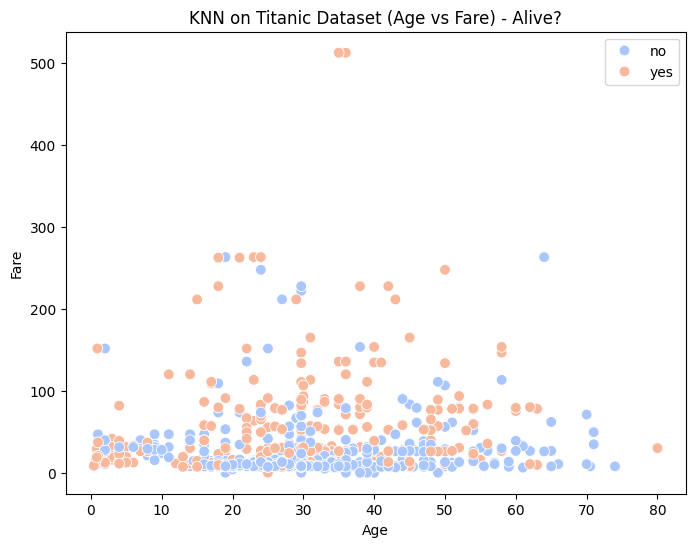

In [12]:
plt.figure(figsize=(8,6))
sb.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='coolwarm', s=60)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('KNN on Titanic Dataset (Age vs Fare) - Alive?')
plt.show()

iii. Prediction

In [13]:
alive = knn.predict([[35,75]]) # Predicting if a passenger aged 35 with a fare of 75 survived or not?
print(f"Prediction for a passenger aged 35 with fare 75: {'Survived' if alive[0] else 'Did not survive'}")

Prediction for a passenger aged 35 with fare 75: Survived


# KNN for Regression

In [15]:
# using knn algorithm for regression 
knnr = KNeighborsRegressor(n_neighbors=5) 
# selecting features and target variable for regression 
X_reg = df[['age', 'sex']].values 
y_reg = df['fare'].values
# encoding sex column 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
X_reg[:, 1] = le.fit_transform(X_reg[:, 1]) 
print(list(le.classes_))
# Fitting the KNN regressor model 
knnr.fit(X_reg, y_reg)

['female', 'male']


KNeighborsRegressor()

In [16]:
# predicting fare for a 32 year old male passenger 
predicted_fare = knnr.predict([[32,1]])
print(f"Predicted fare for a 32 year old male passenger: {predicted_fare[0]:.2f}")

Predicted fare for a 32 year old male passenger: 19.76
